# Air emissions accounts for greenhouse gases - Germany (2010-2022)

### Database interpretation

Quarters - Year and quarter

PCH_SM - Percentage change compared to same period in previous year

THS_T - Thousand tonnes

T_HAB - Tonnes pre capita

### Preparing data for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table("Databases/greenhouseGasEmissionGemany.tsv")
data = data.transpose().reset_index()
data.columns = ["Quarters", "PCH_SM", "THS_T", "T_HAB"]
data = data.replace(' s','', regex=True)
data["THS_T"] = data["THS_T"].apply(pd.to_numeric)
data["T_HAB"] = data["T_HAB"].apply(pd.to_numeric)
data.tail(10)

,Quarters,PCH_SM,THS_T,T_HAB
39,2019-Q4,-5.121,231720.383,2.786
40,2020-Q1,-8.586,221122.920,2.659
41,2020-Q2,-18.994,165795.761,1.994
42,2020-Q3,-7.175,182137.173,2.190
43,2020-Q4,-2.494,225941.186,2.716
44,2021-Q1,3.516,228897.717,2.753
45,2021-Q2,18.996,197290.708,2.373
46,2021-Q3,4.11,189623.211,2.279
47,2021-Q4,5.253,237810.654,2.855
48,2022-Q1,2.333,234238.263,2.811


<AxesSubplot:xlabel='Quarters'>

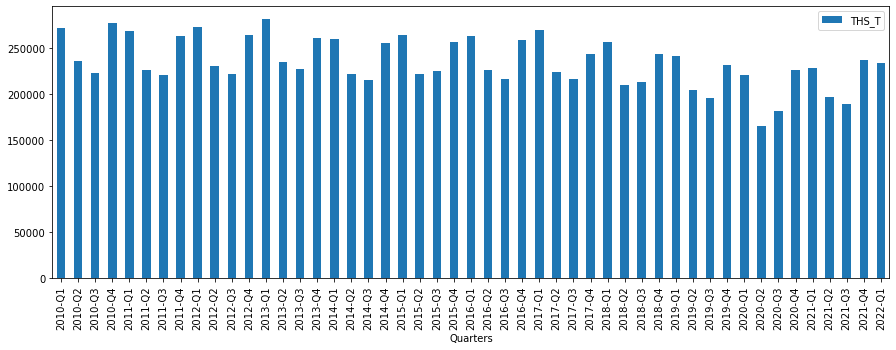

In [2]:
data.plot(kind="bar", x="Quarters", y="THS_T", rot=90, figsize=(15,5))

### Removing covid outliers (2020-Q1 - 2021-Q1)

In [3]:
dataWithoutOutliers = data.drop(data.index[[40,41,42,43,44]])

### Isolating the quarters 1 and 4 without covid outliers

Data length: 22


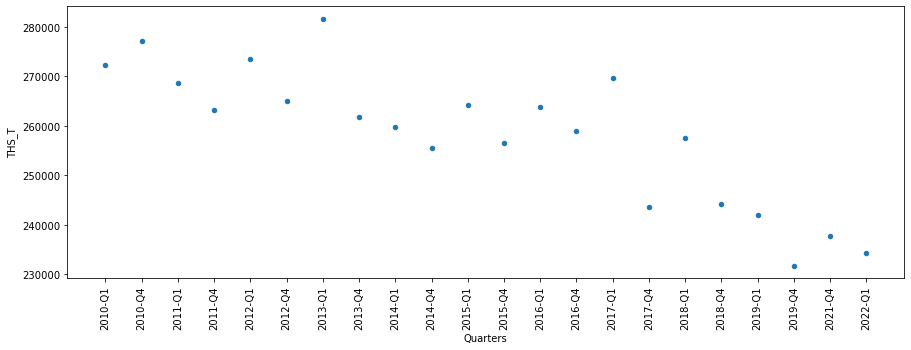

In [4]:
dataQ1Q4 = dataWithoutOutliers[dataWithoutOutliers["Quarters"].str.contains("Q2") == False]
dataQ1Q4 = dataQ1Q4[dataQ1Q4["Quarters"].str.contains("Q3") == False]
dataQ1Q4 = dataQ1Q4.reset_index(drop=True)
dataQ1Q4.plot(kind="scatter", x="Quarters", y="THS_T", rot=90, figsize=(15,5))
print("Data length: {}".format(len(dataQ1Q4)))

### Isolating the quarters 2 and 3 without covid outliers

Data length: 22


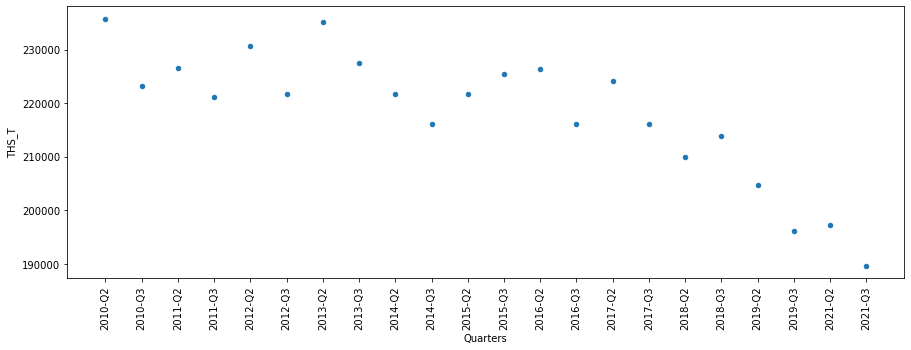

In [5]:
dataQ2Q3 = dataWithoutOutliers[dataWithoutOutliers["Quarters"].str.contains("Q1") == False]
dataQ2Q3 = dataQ2Q3[dataQ2Q3["Quarters"].str.contains("Q4") == False]
dataQ2Q3 = dataQ2Q3.reset_index(drop=True)
dataQ2Q3.plot(kind="scatter", x="Quarters", y="THS_T", rot=90, figsize=(15,5))
print("Data length: {}".format(len(dataQ2Q3)))

### Polynomial regression function definition

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plotPolynomialRegression(dtframe, initialOrder, finalOrder, predList):
    X = dtframe.index
    Y = dtframe["THS_T"].values
    
    for i, pred in enumerate(predList):
        predList[i] = pred + len(dtframe) - 1
        
    y, MAE, orders, yPred = [], [], range(initialOrder, finalOrder + 1), []
    for order in orders:
        model = np.poly1d(np.polyfit(X, Y, order))
        for pred in predList:
            yPred += [model(pred)]
        y += [model(X)]
    
    plt.figure(figsize=(18.5, 10.5))
    plt.subplots_adjust(hspace=0.5)
    
    nrows = len(orders) // 2 + (len(orders) % 2 > 0)
    ite = 0
    
    for i, order in enumerate(orders):
        ax = plt.subplot(nrows, 2, i + 1)
        ax.scatter(X,Y)
        for pred in predList:
            ax.scatter(pred, yPred[ite], color='yellow')
            ite += 1
        ax.plot(X,y[i], color='red')
        ax.set_title('{}-order function'.format(order))
    
    plt.show()
    
    print("Dataset Lenght: {}\n".format(len(dtframe) - 1))
    
    ite = 0
    for i, order in enumerate(orders):
        print("Mean Absolute Error ({}-order function) = {:0.4f}".format(order, mean_absolute_error(Y, y[i])))
        print("Mean Squared Error ({}-order function) = {:0.4f}".format(order, np.sqrt(mean_squared_error(Y, y[i]))))
        print("R2 Score ({}-order function) = {:0.4f}".format(order, r2_score(Y, y[i])))
        for pred in predList:
            print("Predicting {} ({}-order function) = {:0.4f}".format(pred, order, yPred[ite]))
            ite += 1
        print("\n")

### Applying polynomial regression in all data (with covid outliers)

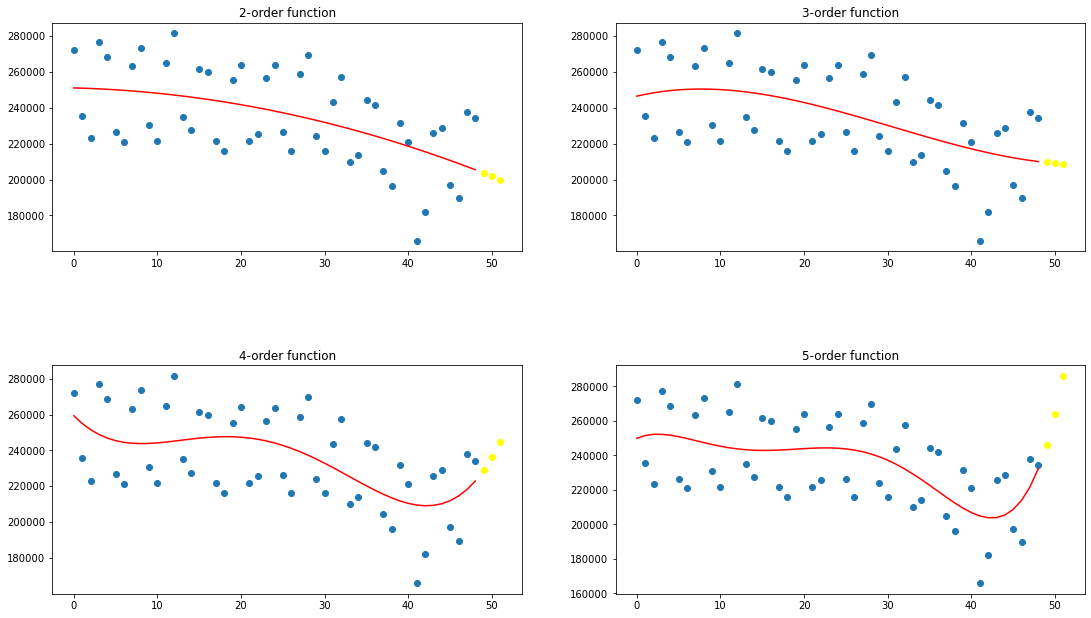

Dataset Lenght: 49

Mean Absolute Error (2-order function) = 20492.1887
Mean Squared Error (2-order function) = 22096.2997
R2 Score (2-order function) = 0.2806
Predicting 49 (2-order function) = 203736.9761
Predicting 50 (2-order function) = 201906.5017
Predicting 51 (2-order function) = 200041.5466


Mean Absolute Error (3-order function) = 20400.0488
Mean Squared Error (3-order function) = 22009.5483
R2 Score (3-order function) = 0.2863
Predicting 49 (3-order function) = 209587.0142
Predicting 50 (3-order function) = 209160.5490
Predicting 51 (3-order function) = 208837.2510


Mean Absolute Error (4-order function) = 20020.3004
Mean Squared Error (4-order function) = 21380.5381
R2 Score (4-order function) = 0.3265
Predicting 49 (4-order function) = 228813.5190
Predicting 50 (4-order function) = 236077.6557
Predicting 51 (4-order function) = 244802.1247


Mean Absolute Error (5-order function) = 19848.5389
Mean Squared Error (5-order function) = 21026.4047
R2 Score (5-order function) 

In [20]:
plotPolynomialRegression(data, 2, 5, [1, 2, 3])

### Applying polynomial regression in all data (without covid outliers)

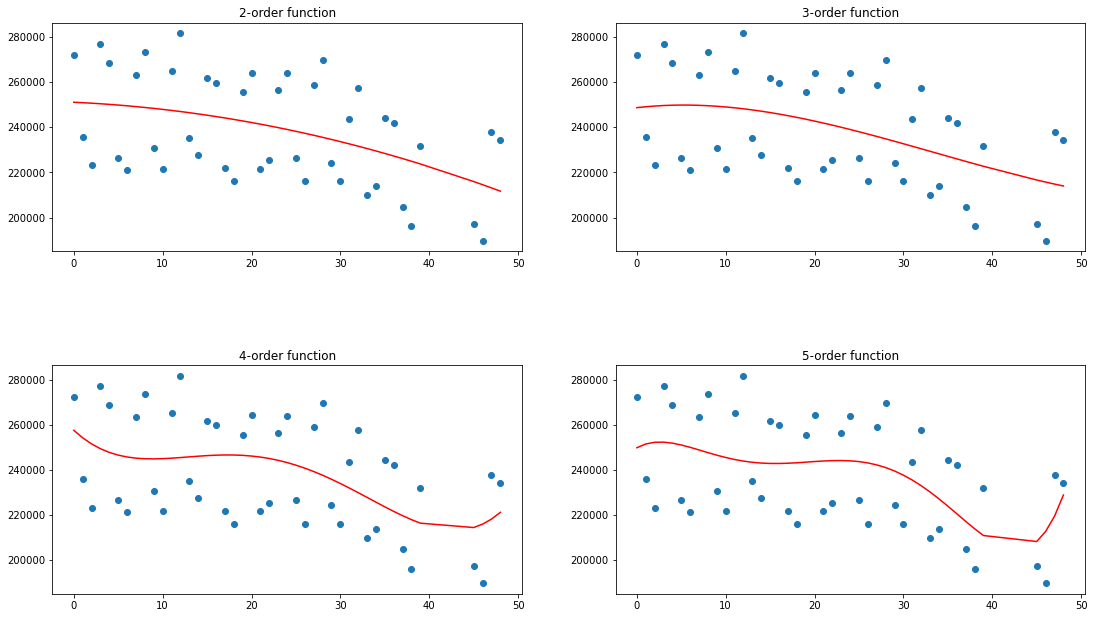

Dataset Lenght: 44

Mean Absolute Error (2-order function) = 20159.0366
Mean Squared Error (2-order function) = 21071.5023
R2 Score (2-order function) = 0.2152
Predicting 45 (2-order function) = 215951.8032
Predicting 46 (2-order function) = 214560.1064
Predicting 47 (2-order function) = 213141.8665


Mean Absolute Error (3-order function) = 20116.2077
Mean Squared Error (3-order function) = 21043.9391
R2 Score (3-order function) = 0.2173
Predicting 45 (3-order function) = 216632.3466
Predicting 46 (3-order function) = 215713.3630
Predicting 47 (3-order function) = 214829.2184


Mean Absolute Error (4-order function) = 19783.8517
Mean Squared Error (4-order function) = 20715.6433
R2 Score (4-order function) = 0.2415
Predicting 45 (4-order function) = 214390.7111
Predicting 46 (4-order function) = 215896.6474
Predicting 47 (4-order function) = 218116.1529


Mean Absolute Error (5-order function) = 19457.6348
Mean Squared Error (5-order function) = 20444.6794
R2 Score (5-order function) 

In [8]:
plotPolynomialRegression(dataWithoutOutliers, 2, 5, [1, 2, 3])

### Applying polynomial regression in 1 and 4 quarters

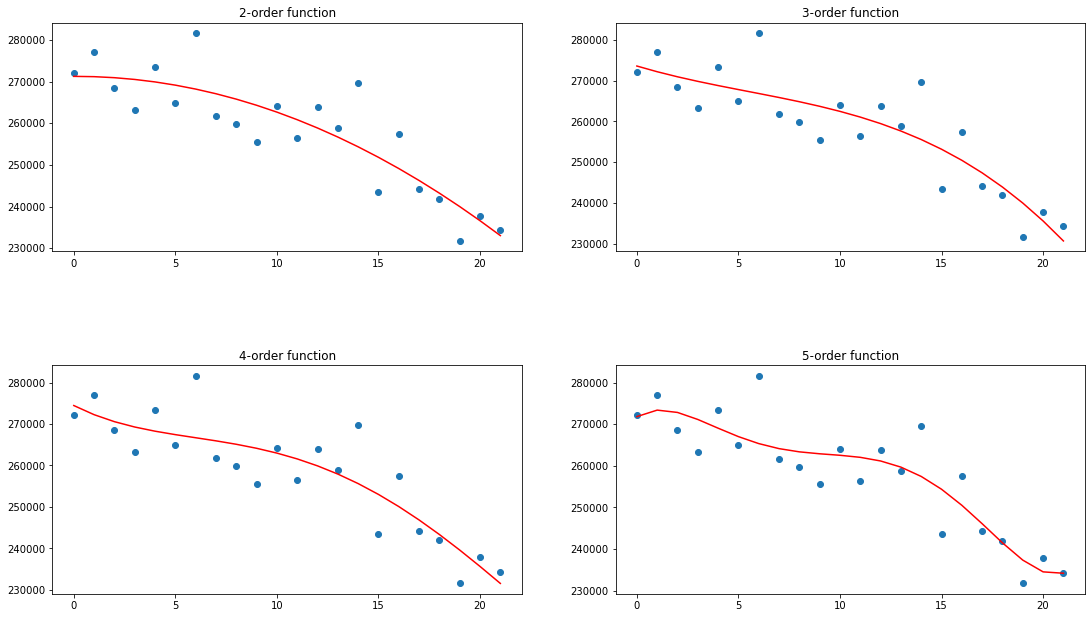

Dataset Lenght: 22

Mean Absolute Error (2-order function) = 5305.9992
Mean Squared Error (2-order function) = 6558.2433
R2 Score (2-order function) = 0.7695
Predicting 23 (2-order function) = 225336.6252
Predicting 24 (2-order function) = 221237.0098
Predicting 25 (2-order function) = 216962.2486


Mean Absolute Error (3-order function) = 5305.7975
Mean Squared Error (3-order function) = 6455.6276
R2 Score (3-order function) = 0.7767
Predicting 23 (3-order function) = 219218.2328
Predicting 24 (3-order function) = 212583.8547
Predicting 25 (3-order function) = 205302.3407


Mean Absolute Error (4-order function) = 5213.4254
Mean Squared Error (4-order function) = 6440.2097
R2 Score (4-order function) = 0.7777
Predicting 23 (4-order function) = 223170.8849
Predicting 24 (4-order function) = 219064.3658
Predicting 25 (4-order function) = 215128.8178


Mean Absolute Error (5-order function) = 4735.5219
Mean Squared Error (5-order function) = 6242.6594
R2 Score (5-order function) = 0.7912

In [9]:
plotPolynomialRegression(dataQ1Q4, 2, 5, [1, 2, 3])

### Applying polynomial regression in 2 and 3 quarters

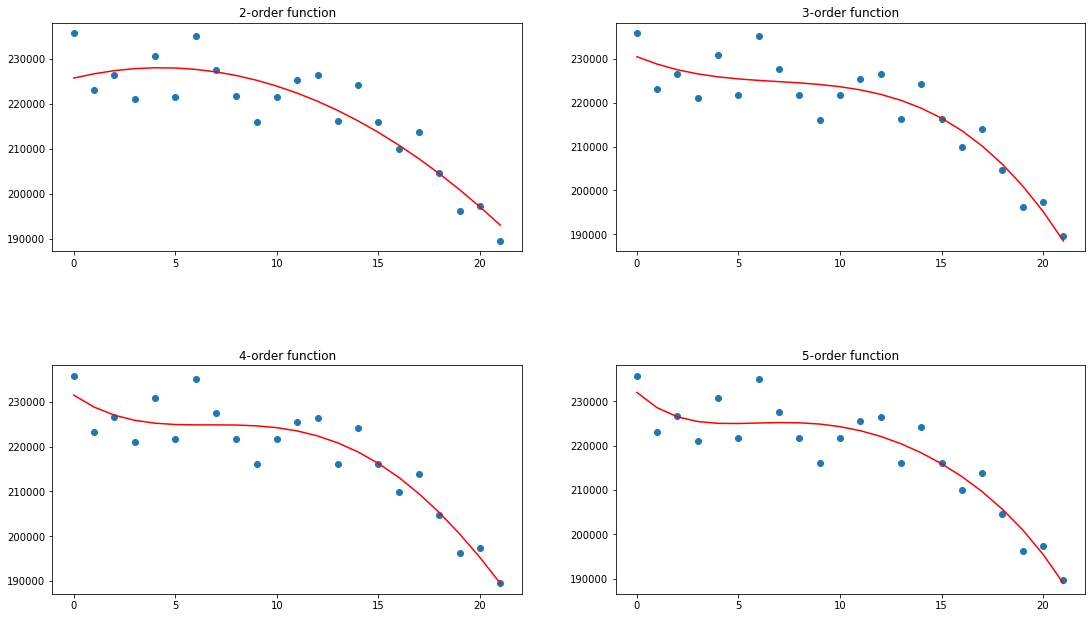

Dataset Lenght: 22

Mean Absolute Error (2-order function) = 4150.0593
Mean Squared Error (2-order function) = 5062.2043
R2 Score (2-order function) = 0.8214
Predicting 23 (2-order function) = 184237.7245
Predicting 24 (2-order function) = 179422.3582
Predicting 25 (2-order function) = 174356.4007


Mean Absolute Error (3-order function) = 3879.3758
Mean Squared Error (3-order function) = 4511.6859
R2 Score (3-order function) = 0.8582
Predicting 23 (3-order function) = 172082.6550
Predicting 24 (3-order function) = 162231.6171
Predicting 25 (3-order function) = 151192.3111


Mean Absolute Error (4-order function) = 3721.0485
Mean Squared Error (4-order function) = 4480.3805
R2 Score (4-order function) = 0.8601
Predicting 23 (4-order function) = 176785.8156
Predicting 24 (4-order function) = 169942.6128
Predicting 25 (4-order function) = 162884.5869


Mean Absolute Error (5-order function) = 3735.2870
Mean Squared Error (5-order function) = 4467.6422
R2 Score (5-order function) = 0.8609

In [10]:
plotPolynomialRegression(dataQ2Q3, 2, 5, [1, 2, 3])